In [1]:
from pylab import*
import numpy as np
import pandas as pd
import scipy.stats 
from scipy.special import gamma
import seaborn as sns
from scipy.stats import spearmanr
from scipy.stats import beta

# Pregunta 2

In [2]:
bd="data_schools.xlsx"
bd_escuelas=pd.read_excel(bd)
bd_escuelas #Vemos si cargó

,escuela,LSAT,GPA
0,1,622,3.23
1,2,542,2.83
2,3,579,3.24
3,4,653,3.12
4,5,606,3.09
...,...,...,...
77,78,590,3.15
78,79,558,2.81
79,80,611,3.16
80,81,564,3.02


## Para n

In [55]:
#Seleccionamos aleatoriamente n escuelas
cor=np.zeros(3200)
for  i in range(0,3200):
    escuelas_random=bd_escuelas.sample(n=15,replace=True)
    cor[i]= spearmanr(escuelas_random.LSAT, escuelas_random.GPA)[0]
print(cor)

[0.4801444  0.89982111 0.73476703 ... 0.59910531 0.76139441 0.70420046]


In [56]:
#El error estándar bootstrap es:
err_bt=np.std(cor)
err_bt

0.1476726831818904

In [57]:
#La correlación sin bootstrap es:
cor_data = spearmanr(bd_escuelas.LSAT, bd_escuelas.GPA)[0]
cor_data

0.7526621356232132

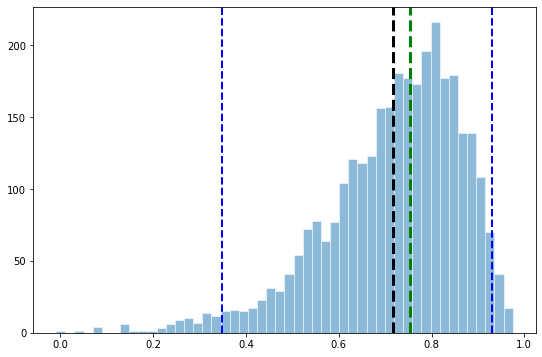

Correlación sin Bootsrap: 0.7526621356232132
Promedio de correlación de la muestras Bootstrap: 0.7178117606845299
Error estándar las muestras Bootstrap: 0.1476726831818904
( 0.34880025748264926 , 0.9303505762726403 )


In [58]:
#Hacemos el gráfico 
fig, ax = plt.subplots(figsize=(9,6))
hist(cor,bins=50,alpha=0.5,edgecolor="white",label="Error estándar Boostrap")
axvline(x=cor_data,color='green', linestyle='--',linewidth=3,label="Correlación sin bootstrap$")
axvline(x=np.mean(cor),color='black', linestyle='--',linewidth=3,label="Promedio de correlación con  Boostrap$")

axvline(percentile(cor,2.5),color="blue",linestyle="--",linewidth=2)                                                                                                                                                    
axvline(percentile(cor,97.5),color="blue",linestyle="--",linewidth=2) 
show()
print("Correlación sin Bootsrap:", cor_data)
print("Promedio de correlación de la muestras Bootstrap:", np.mean(cor))
print("Error estándar las muestras Bootstrap:", err_bt)
print("(", percentile(cor,2.5),",",percentile(cor,97.5),")")

In [25]:
#Podemos notar que conforme el número de simulaciones Boostrap aumenta, el error estándar
#baja.
estimadores_se_bt=np.zeros(3200)
for i in range(len(cor)):
    estimadores_se_bt[i]=np.std(cor[0:(i+1)])
estimadores_se_bt

array([0.        , 0.23808778, 0.20719538, ..., 0.13309749, 0.13307736,
       0.13309356])

In [27]:
min(estimadores_se_bt[1:])

0.13138801511477796

In [28]:
np.asarray(estimadores_se_bt==min(estimadores_se_bt[1:])).nonzero()

(array([1901]),)

In [29]:
estimadores_se_bt[1901]

0.13138801511477796

Acorde a esto, 1902 simulaciones boostrap minimiza el error estándar. Ya que el índice i es hasta i+1 iteraciones boostrap

## Para n-1

In [71]:
#Seleccionamos aleatoriamente n-1 escuelas
cor_2=np.zeros(3200)
for  i in range(0,3200):
    escuelas_random=bd_escuelas.sample(n=15,replace=True)
    escuelas_random=escuelas_random.sample(n=14,replace=True)
    cor_2[i]= spearmanr(escuelas_random.LSAT, escuelas_random.GPA)[0]
print(cor_2)

[0.85714286 0.94196429 0.11778218 ... 0.65834322 0.69444444 0.83212228]


In [72]:
#El error estándar bootstrap es:
err_bt_2=np.std(cor_2)
err_bt_2

0.2323708405692049

In [73]:
#La correlación sin bootstrap es:
cor_data = spearmanr(bd_escuelas.LSAT, bd_escuelas.GPA)[0]
cor_data

0.7526621356232132

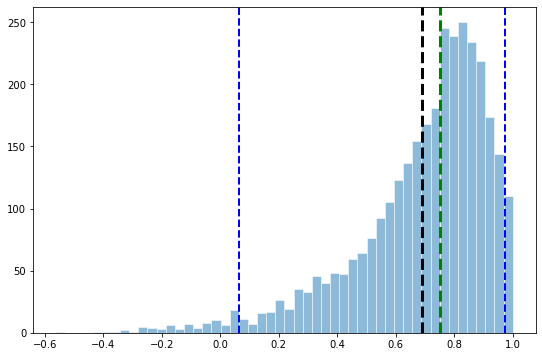

Correlación sin Bootsrap: 0.7526621356232132
Promedio de correlación de la muestras Bootstrap: 0.6906978238464879
Error estándar las muestras Bootstrap: 0.2323708405692049
( 0.06278273098012183 , 0.9749152015732035 )


In [74]:
#Hacemos el gráfico 
fig, ax = plt.subplots(figsize=(9,6))
hist(cor_2,bins=50,alpha=0.5,edgecolor="white",label="Error estándar Boostrap")
axvline(x=cor_data,color='green', linestyle='--',linewidth=3,label="Correlación sin bootstrap$")
axvline(x=np.mean(cor_2),color='black', linestyle='--',linewidth=3,label="Promedio de correlación con  Boostrap$")

axvline(percentile(cor_2,2.5),color="blue",linestyle="--",linewidth=2)                                                                                                                                                    
axvline(percentile(cor_2,97.5),color="blue",linestyle="--",linewidth=2) 
show()
print("Correlación sin Bootsrap:", cor_data)
print("Promedio de correlación de la muestras Bootstrap:", np.mean(cor_2))
print("Error estándar las muestras Bootstrap:", err_bt_2)
print("(", percentile(cor_2,2.5),",",percentile(cor_2,97.5),")")

In [36]:
#Podemos notar que conforme el número de simulaciones Boostrap aumenta, el error estándar
#baja.
estimadores_se_bt2=np.zeros(3200)
for i in range(len(cor_2)):
    estimadores_se_bt2[i]=np.std(cor_2[0:(i+1)])
estimadores_se_bt2

array([0.        , 0.07513741, 0.12863418, ..., 0.14009263, 0.14010005,
       0.14008291])

In [44]:
min(estimadores_se_bt2[10:])

0.13758659684753416

In [45]:
np.asarray(estimadores_se_bt2==min(estimadores_se_bt2[10:])).nonzero()

(array([1622]),)

In [48]:
estimadores_se_bt2[1622]

0.13758659684753416

Acorde a esto, 1624 simulaciones boostrap minimiza el error estándar. Ya que el índice i es hasta i+1 iteraciones boostrap

## Para toda la muestra

In [80]:
#Seleccionamos aleatoriamente n=82, que es el tamaño de la muestra, escuelas
cor_3=np.zeros(3200)
for  i in range(0,3200):
    escuelas_random=bd_escuelas.sample(n=82,replace=True)
    cor_3[i]= spearmanr(escuelas_random.LSAT, escuelas_random.GPA)[0]
print(cor_3)

[0.76925891 0.65242989 0.77990898 ... 0.5751559  0.79042727 0.75691227]


In [81]:
#El error estándar bootstrap es:
err_bt_3=np.std(cor_3)
err_bt_3

0.05544886992211036

In [82]:
#La correlación sin bootstrap es:
cor_data = spearmanr(bd_escuelas.LSAT, bd_escuelas.GPA)[0]
cor_data

0.7526621356232132

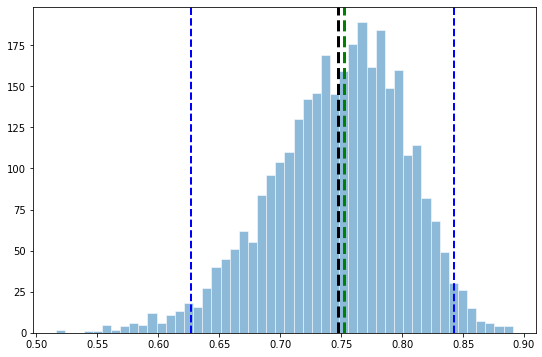

Correlación sin Bootsrap: 0.7526621356232132
Promedio de correlación de la muestras Bootstrap: 0.7471735420039525
Error estándar las muestras Bootstrap: 0.05544886992211036
( 0.627056360871604 , 0.842496949623107 )


In [83]:
#Hacemos el gráfico 
fig, ax = plt.subplots(figsize=(9,6))
hist(cor_3,bins=50,alpha=0.5,edgecolor="white",label="Error estándar Boostrap")
axvline(x=cor_data,color='green', linestyle='--',linewidth=3,label="Correlación sin bootstrap$")
axvline(x=np.mean(cor_3),color='black', linestyle='--',linewidth=3,label="Promedio de correlación con  Boostrap$")

axvline(percentile(cor_3,2.5),color="blue",linestyle="--",linewidth=2)                                                                                                                                                    
axvline(percentile(cor_3,97.5),color="blue",linestyle="--",linewidth=2) 
show()
print("Correlación sin Bootsrap:", cor_data)
print("Promedio de correlación de la muestras Bootstrap:", np.mean(cor_3))
print("Error estándar las muestras Bootstrap:", err_bt_3)
print("(", percentile(cor_3,2.5),",",percentile(cor_3,97.5),")")

In [84]:
#Podemos notar que conforme el número de simulaciones Boostrap aumenta, el error estándar
#baja.
estimadores_se_bt3=np.zeros(3200)
for i in range(len(cor_3)):
    estimadores_se_bt3[i]=np.std(cor_3[0:(i+1)])
estimadores_se_bt3

array([0.        , 0.05841451, 0.05774788, ..., 0.05546066, 0.05545727,
       0.05544887])

In [85]:
min(estimadores_se_bt3[10:])

0.049357589713548186

In [87]:
np.asarray(estimadores_se_bt3==min(estimadores_se_bt3[20:])).nonzero()

(array([171]),)

In [79]:
estimadores_se_bt2[78]

0.15391979568643235

Acorde a esto, 79 simulaciones boostrap minimiza el error estándar. Ya que el índice i es hasta i+1 iteraciones boostrap

# Pregunta 3

In [88]:
bd2="lineal_horm.xlsx"
bd_horm=pd.read_excel(bd2)
bd_horm

,lote,horas,monto
0,A,99,25.8
1,A,152,20.5
2,A,293,14.3
3,A,155,23.2
4,A,196,20.6
5,A,53,31.1
6,A,184,20.9
7,A,171,20.9
8,A,52,30.4
9,B,376,16.3
